## Analyze ShapeTalk w.r.t. its language usage
####  E.g.,  dimensional, vs. part-centric, vs. style-centric analysis

In [1]:
import inflect
import pandas as pd
from ast import literal_eval

from changeit3d.language.holistic_dimensional_language import holistic_expressions_mask
from changeit3d.language.part_words import part_names_all_classes, human_body_inspired_part_names
from changeit3d.language.word_meanings import shape_words, spatial_prepositions, style_hotwords
from changeit3d.utils.visualization import visualize_src_trg_df_at_loc_i

%load_ext autoreload
%autoreload 2

In [2]:
def plurals(word_set):
    p = inflect.engine()
    new_words = set()
    for word in word_set:
        new_words.add(p.plural(word))
    return new_words

### Use the downloaded ShapeTalk  data and point to the underlying directories:

In [3]:
top_img_dir = '../../../data/shapetalk/images/full_size'
shapetalk_file =  '../../../data/shapetalk/language/shapetalk/shapetalk_preprocessed_public_version_0.csv'

In [4]:
df = pd.read_csv(shapetalk_file)
df.tokens = df.tokens.apply(literal_eval)
print('Number of distinct utterances', len(df))

Number of distinct utterances 536596


In [8]:
holistic_expressions_mask(df, 'utterance_spelled', use_object_class_nouns=True);

tall 0.0099
short 0.01
wide 0.0032
long 0.0057
deep 0.0014
shallow 0.0002
Overall 0.0304


In [9]:
per_class_total_holistic_fraction = dict()

for name, group in df.groupby('source_object_class'):    
    mask = holistic_expressions_mask(group, 'utterance_spelled', use_object_class_nouns=True, verbose=False);
    per_class_total_holistic_fraction[name] = mask.mean().round(4)

holistic_lang_per_class = pd.DataFrame(per_class_total_holistic_fraction, index=[0]).T
holistic_lang_per_class.columns = ['overall-frequency']
holistic_lang_per_class.sort_values('overall-frequency')[::-1]

,overall-frequency
bookshelf,0.1000
cabinet,0.0881
flowerpot,0.0792
bathtub,0.0714
dresser,0.0661
vase,0.0652
table,0.0524
trashbin,0.0511
clock,0.0302
lamp,0.0284


In [19]:
## most common expressions per class
g = df.groupby('target_object_class')
for name, gg in g:
    print('----------')
    print(name)
    print('----------')
    ggg = gg.groupby('utterance_spelled')
    s = ggg.size().sort_values(ascending=False) 
    
    cumulative_fraction = 0.0
    for i, x in s.head(10).items():
        fraction_of_utterance_i = round(x / len(gg), 3) # divide over ALL (not unique) utterances of the class
        print("{:50s} {:.3f}".format(i, fraction_of_utterance_i))
        cumulative_fraction += fraction_of_utterance_i
    
    print("{:50s} {:.3f}".format("CUMULATIVE-FRACTION:", cumulative_fraction))
    print()
    print()

----------
airplane
----------
it does not have a propeller                       0.005
it has four engines                                0.004
it has a propeller                                 0.004
the fuselage is long -er                           0.004
it has two engines                                 0.004
it has a long -er fuselage                         0.004
it has winglets                                    0.003
the fuselage is short -er                          0.003
it does not have wheels                            0.003
it has a small -er wingspan                        0.003
CUMULATIVE-FRACTION:                               0.037


----------
bag
----------
it has two handles                                 0.010
it has one handle                                  0.007
it has handles                                     0.005
it has a strap                                     0.005
it is tall -er                                     0.005
it has a handle              

In [26]:
style_mask = df.tokens.apply(lambda x: len(set(x).intersection(style_hotwords)) > 0)
print(style_mask.mean())

0.03009526720288634


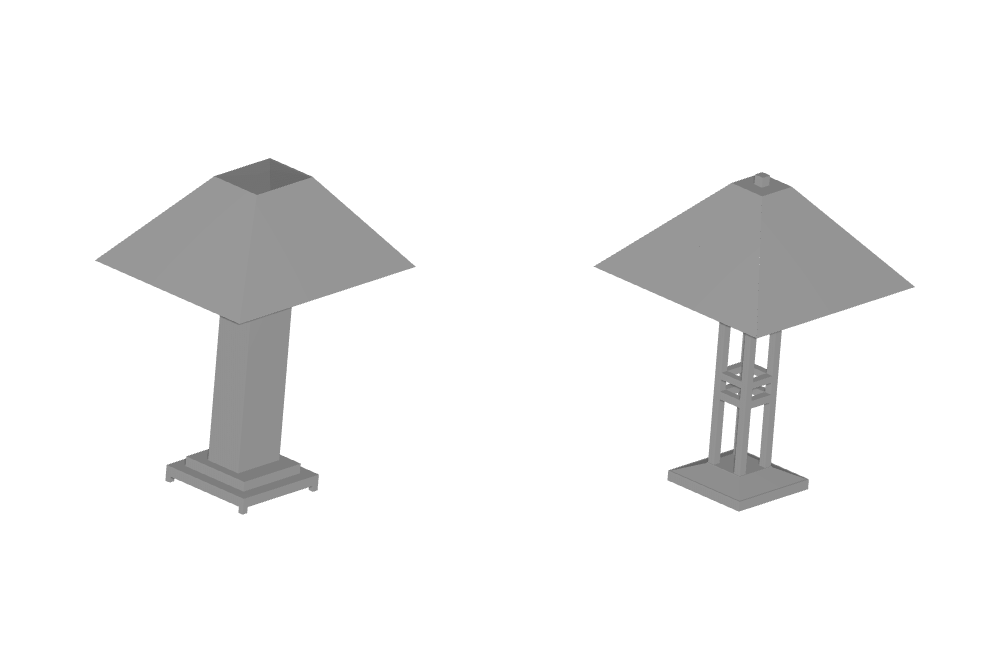

3QL2OFSM98BX4NDHI86AWCMKPOLNCC
utterance1:
Original: The shade has a square design.
Spelled: the shade has a square design


In [27]:
i = df[style_mask].sample().index[0]
visualize_src_trg_df_at_loc_i(df, i, top_img_dir)

In [30]:
check = set(shape_words)
mu = df.tokens.apply(lambda x: len(set(x).intersection(check)) > 0).mean()
print('Fraction making shape references', mu)

check = set(spatial_prepositions)
mu = df.tokens.apply(lambda x: len(set(x).intersection(check)) > 0).mean()
print('Fraction using spatial preposition', mu)

Fraction making shape references 0.48898985456470045
Fraction using spatial preposition 0.15473093351422673


In [38]:
##########################
# Part based word-analysis
##########################

In [39]:
classes_in_sn = df.source_object_class.unique()
print('classes:', len(classes_in_sn), '\n', classes_in_sn)

classes: 30 
 ['faucet' 'cap' 'plant' 'cabinet' 'bookshelf' 'knife' 'table' 'skateboard'
 'mug' 'vase' 'pistol' 'flowerpot' 'clock' 'chair' 'bathtub' 'bottle'
 'display' 'bag' 'trashbin' 'scissors' 'person' 'helmet' 'bowl' 'airplane'
 'guitar' 'dresser' 'bed' 'sofa' 'bench' 'lamp']


In [42]:
all_part_names = set()
for part_names_of_class in part_names_all_classes.values():
    all_part_names.update(part_names_of_class)
print('Total names of parts', len(all_part_names))

Total names of parts 272


In [46]:
# the following can refer to part-names in some cases but also not; to simplify we ignore them

ambiguous = \
['bottom', 'desk',  'side', 'faucet', 'keyboard', 'nightstand', 'monitor', 'cabinet', 'light', 'lamp']

ambiguous = set(ambiguous)
all_part_names.difference_update(ambiguous)

In [47]:
# consider plural form 

all_part_names.update(plurals(all_part_names))

human_body_inspired_part_names.update(plurals(human_body_inspired_part_names))

In [48]:
x1 = df.tokens.apply(lambda x: len(set(x).intersection(all_part_names)) > 0).mean()
x2 = df.tokens.apply(lambda x: len(set(x).intersection(human_body_inspired_part_names)) > 0).mean()

print("lower bound (fraction) using part names ", x1)
print("lower bound (fraction) using part names inspired by human anatomy (e.g., leg) ", x2)

lower bound (fraction) using part names  0.8146370826469076
lower bound (fraction) using part names inspired by human anatomy (e.g., leg)  0.22559057465952037


In [53]:
generic_part_names = part_names_all_classes['generic']
part_ref_per_class = dict()

for object_class, part_names_of_class in sorted(part_names_all_classes.items()):
     
    if object_class in classes_in_sn:
        ndf = df[df.source_object_class == object_class]
        print(object_class)    
        part_names_of_class.update(plurals(part_names_of_class))
        
        for tag, use in zip(['human-inspired', 'class-only', 'class+general', 'all_part_names'],
                            [human_body_inspired_part_names, part_names_of_class, 
                             generic_part_names.union(part_names_of_class), all_part_names]):
            
            usage_mean = ndf.tokens.apply(lambda x: len(set(x).intersection(use)) > 0).mean()
            print(tag, usage_mean)     
        
            part_ref_per_class[(object_class, tag)] = usage_mean
                    
        print()

airplane
human-inspired 0.03682789651293588
class-only 0.7651743532058493
class+general 0.7932958380202475
all_part_names 0.8907311586051744

bag
human-inspired 0.10670273519687407
class-only 0.43733092876465285
class+general 0.5758941989780583
all_part_names 0.6588518184550646

bathtub
human-inspired 0.044075084759778387
class-only 0.40254692797486147
class+general 0.5264202431158521
all_part_names 0.5577606880013231

bed
human-inspired 0.14626765299260255
class-only 0.752656355077337
class+general 0.8113651647612643
all_part_names 0.8376597175521183

bench
human-inspired 0.36503103407893195
class-only 0.8442830932583831
class+general 0.8619666627630089
all_part_names 0.8740289651403365

bookshelf
human-inspired 0.043378428695544244
class-only 0.570932108725332
class+general 0.69659923048281
all_part_names 0.7106863596872285

bottle
human-inspired 0.5114464982194337
class-only 0.6174325928438189
class+general 0.7137527556384602
all_part_names 0.742411395624894

bowl
human-inspired 0.1

In [54]:
x = pd.DataFrame.from_records([part_ref_per_class]).T
x.loc[[i for i in x.index if 'all_part_names' in i]][0].sort_values()

(person, all_part_names)        0.419504
(bathtub, all_part_names)       0.557761
(clock, all_part_names)         0.637742
(bag, all_part_names)           0.658852
(bowl, all_part_names)          0.688761
(dresser, all_part_names)       0.694462
(cabinet, all_part_names)       0.702332
(helmet, all_part_names)        0.709524
(bookshelf, all_part_names)     0.710686
(flowerpot, all_part_names)     0.713591
(mug, all_part_names)           0.737138
(bottle, all_part_names)        0.742411
(trashbin, all_part_names)      0.742611
(cap, all_part_names)           0.761325
(vase, all_part_names)          0.793101
(table, all_part_names)         0.795147
(lamp, all_part_names)          0.813600
(pistol, all_part_names)        0.829056
(plant, all_part_names)         0.834816
(bed, all_part_names)           0.837660
(sofa, all_part_names)          0.847022
(display, all_part_names)       0.853839
(bench, all_part_names)         0.874029
(guitar, all_part_names)        0.876331
(airplane, all_p

In [55]:
possesive = set(['has', 'have', 'with', 'without'])
possesive_mask = df.tokens.apply(lambda x: len(set(x).intersection(possesive)) > 0)
print(possesive_mask.mean())

0.44597425251026845


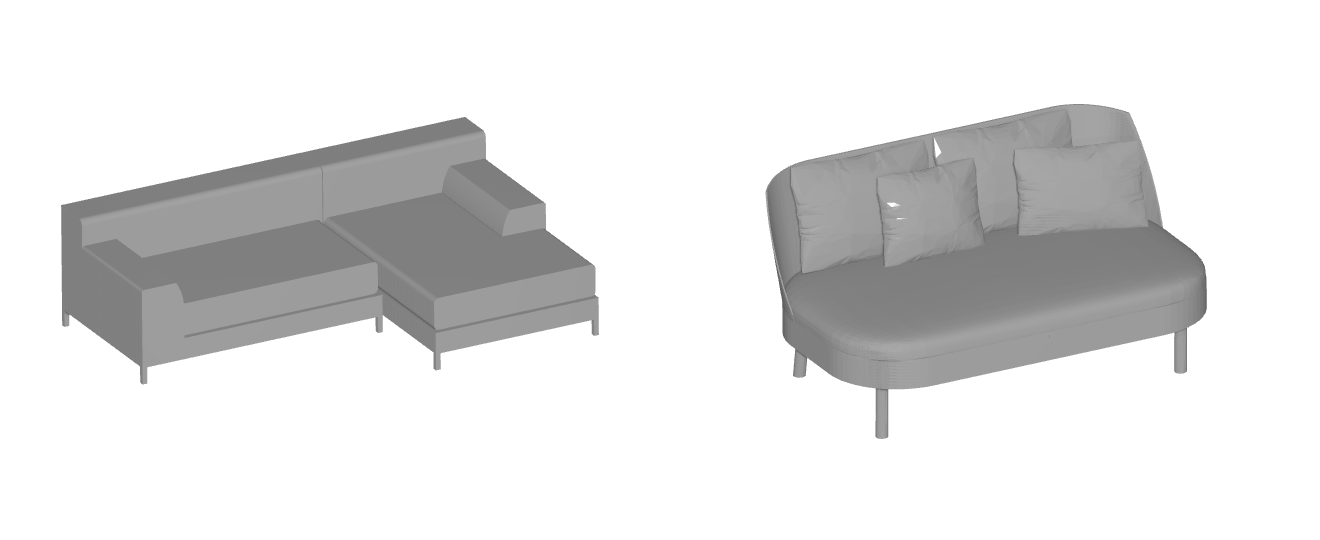

3YW4XOSQKSEQCANSZCTCTBVNUZZU1M
utterance3:
Original: it has throw pillows
Spelled: it has throw pillows


In [56]:
visualize_src_trg_df_at_loc_i(df, df[possesive_mask].sample(1).index[0], top_img_dir=top_img_dir)

In [58]:
object_class = 'bed'

ndf = df[df.source_object_class == object_class]
part_names_of_class = part_names_all_classes[object_class]
part_names_of_class.update(plurals(part_names_of_class))

# use = part_names_of_class
# use = generic_part_names.union(part_names_of_class)
use = all_part_names

no_part_mask = ndf.tokens.apply(lambda x: len(set(x).intersection(use)) == 0)
no_part = ndf[no_part_mask]
print(1-no_part_mask.mean())

0.8376597175521183


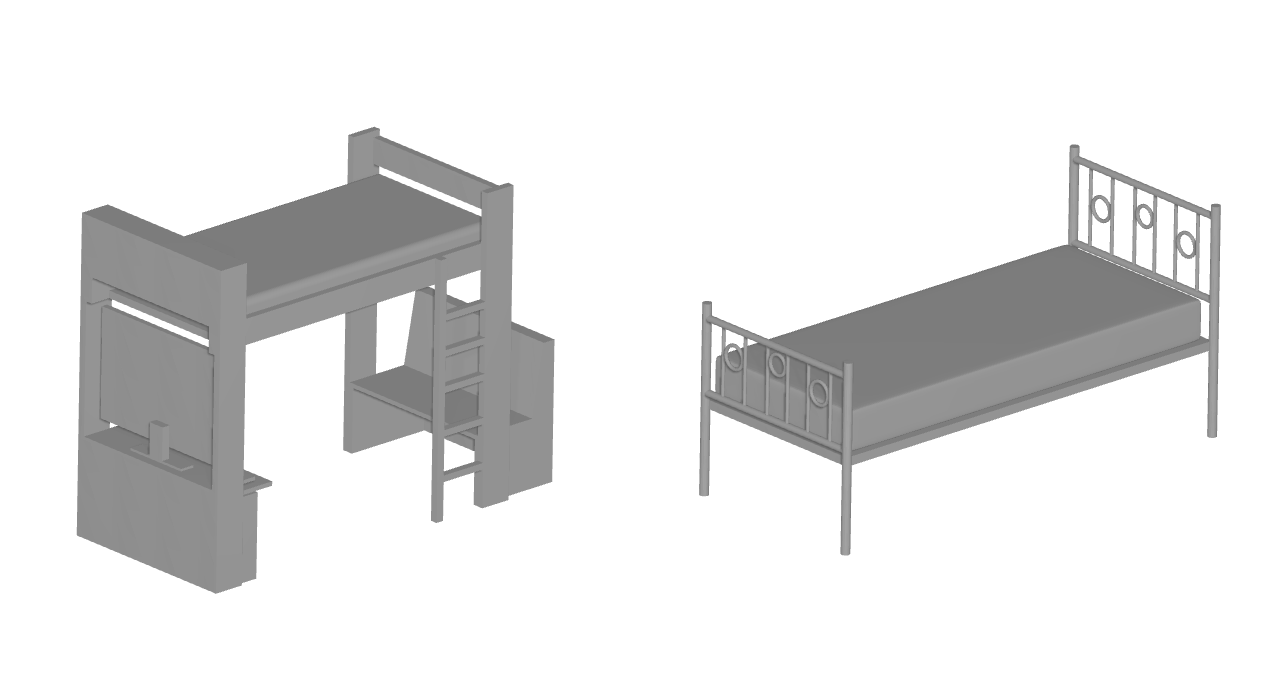

3YT88D1N0AR8JHWVS23TBH1MSJU3KP
utterance0:
Original: Target appears to be a wrought-iron single bed
Spelled: target appears to be a wrought iron single bed


In [59]:
visualize_src_trg_df_at_loc_i(df, no_part.sample(1).index[0], top_img_dir=top_img_dir)